In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
# kda cs gold 를 입력해주면 승률을 계산해주는 AI

In [10]:
df = pd.read_csv('./data/all_cards.csv')

In [11]:
df

,id,name,type,frameType,description,level,atk,def,race,attribute,archetype
0,34541863,"""A"" Cell Breeding Device",Spell Card,spell,During each of your Standby Phases put 1 A-Co...,NaN,NaN,NaN,Continuous,NaN,Alien
1,64163367,"""A"" Cell Incubator",Spell Card,spell,Each time an A-Counter(s) is removed from play...,NaN,NaN,NaN,Continuous,NaN,Alien
2,91231901,"""A"" Cell Recombination Device",Spell Card,spell,Target 1 face-up monster on the field; send 1 ...,NaN,NaN,NaN,Quick-Play,NaN,Alien
3,73262676,"""A"" Cell Scatter Burst",Spell Card,spell,"Select 1 face-up ""Alien"" monster you control. ...",NaN,NaN,NaN,Quick-Play,NaN,Alien
4,98319530,"""Infernoble Arms - Almace""",Spell Card,spell,While this card is equipped to a monster: You ...,NaN,NaN,NaN,Equip,NaN,Infernoble Arms
...,...,...,...,...,...,...,...,...,...,...,...
12845,2648201,ZW - Sleipnir Mail,Effect Monster,effect,"You can target 1 ""Utopia"" monster you control;...",4.0,1000.0,1000.0,Beast,LIGHT,Utopia
12846,95886782,ZW - Sylphid Wing,Effect Monster,effect,"You can only control 1 ""ZW - Sylphid Wing"". Yo...",4.0,800.0,1600.0,Beast,LIGHT,Zexal
12847,81471108,ZW - Tornado Bringer,Effect Monster,effect,"You can target 1 ""Utopia"" monster you control;...",5.0,1300.0,1800.0,Dragon,WIND,Utopia
12848,18865703,ZW - Ultimate Shield,Effect Monster,effect,When this card is Normal or Special Summoned: ...,4.0,0.0,2000.0,Aqua,EARTH,Utopia


In [12]:
df.isna()

,id,name,type,frameType,description,level,atk,def,race,attribute,archetype
0,False,False,False,False,False,True,True,True,False,True,False
1,False,False,False,False,False,True,True,True,False,True,False
2,False,False,False,False,False,True,True,True,False,True,False
3,False,False,False,False,False,True,True,True,False,True,False
4,False,False,False,False,False,True,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
12845,False,False,False,False,False,False,False,False,False,False,False
12846,False,False,False,False,False,False,False,False,False,False,False
12847,False,False,False,False,False,False,False,False,False,False,False
12848,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isna().sum()

id                0
name              0
type              0
frameType         0
description       0
level          4885
atk            4494
def            4884
race              1
attribute      4494
archetype      5368
dtype: int64

In [14]:
df.columns

Index(['id', 'name', 'type', 'frameType', 'description', 'level', 'atk', 'def',
       'race', 'attribute', 'archetype'],
      dtype='object')

In [30]:
df['attribute']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
12845    LIGHT
12846    LIGHT
12847     WIND
12848    EARTH
12849    LIGHT
Name: attribute, Length: 12850, dtype: object

In [33]:
df.loc[df['attribute'] == 'DARK'].value_counts()

id         name                            type                   frameType  description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    level  atk     def     race     attribute  archetype             
2511       Labrynth Cooclock               Effect Monster         effect     (Quick Effect): You can discard this card; this turn  you can activate 1 Normal Trap Card that was Set this turn  if you control a "Labrynth" monster. If a card(s) is sent from your hand to the GY to activate your Normal Trap Card or you

In [40]:
df.describe()

,id,level,atk,def
count,1.285000e+04,7965.000000,8356.00000,7966.000000
mean,5.234691e+07,4.575895,1479.03303,1247.835802
std,3.926795e+07,2.402216,945.96842,868.478787
min,2.511000e+03,0.000000,0.00000,0.000000
25%,2.471133e+07,3.000000,800.00000,500.000000
50%,4.988088e+07,4.000000,1500.00000,1200.000000
75%,7.537976e+07,6.000000,2200.00000,1900.000000
max,5.010000e+08,13.000000,5000.00000,5000.000000


In [42]:
df['level'].max()

13.0

In [43]:
df['atk'].max()

5000.0

In [45]:
df['def'].max()

5000.0

In [55]:
sort_level = df['level'].sort_values()

7300     0.0
1825     0.0
7973     0.0
7974     0.0
7975     0.0
        ... 
12799    NaN
12802    NaN
12808    NaN
12813    NaN
12815    NaN
Name: level, Length: 12850, dtype: float64

C:\Users\AWS_\anaconda3\envs\streamlit39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AWS_\anaconda3\envs\streamlit39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AWS_\anaconda3\envs\streamlit39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


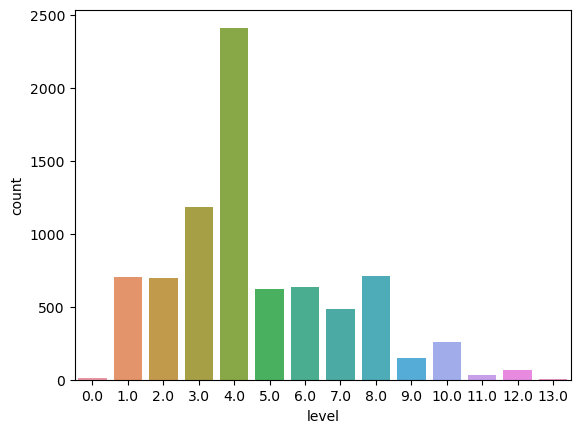

In [58]:
sb.countplot(data = df, x = 'level')
plt.show()

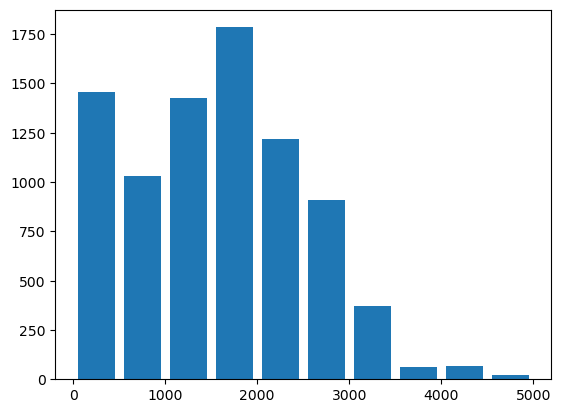

In [61]:
plt.hist(data = df, x = 'atk', rwidth = 0.8)
plt.show()

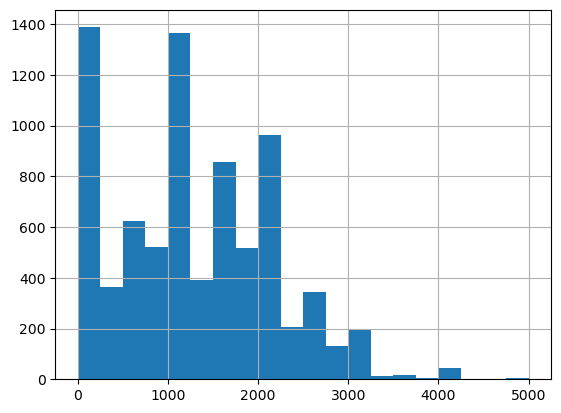

In [62]:
df['def'].hist(bins=20)
plt.show()

In [63]:
df_corr = df.corr(numeric_only=True)

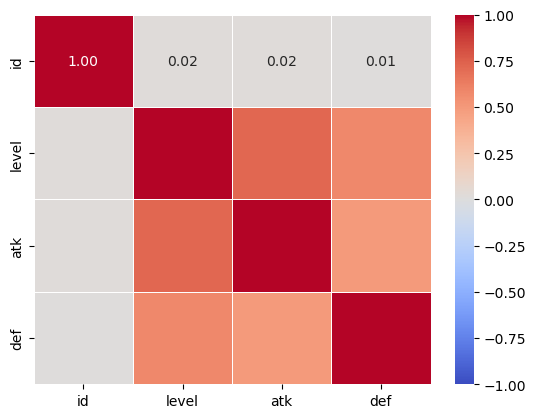

In [64]:
sb.heatmap(data = df_corr, vmin = -1, vmax = 1, cmap = 'coolwarm',
          annot = True, fmt = '.2f', linewidths=0.5)
plt.show()